# Lab01: Ensemble Methods using IrisData

* to practice different ensemble classifiers with Iris dataset, bagging and boosting
* to build and evaluate Radom Forest classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 1. Prepare Data

In [2]:
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
import pandas as pd   
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100, shuffle=True)

# 2. Decision Tree Classifer
#### First, train a Decision Tree Classifier for the comparision with ensemble models

In [5]:
#define DecisionTree model
# ?tree.DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()

#train the model with train data set
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
#check model accracy in terms of test dataset
acc = clf.score(X_test, y_test)
print("Accuracy=", acc)

Accuracy= 0.9666666666666667


In [7]:
#check feature importance
print(iris.feature_names)
print(clf.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.         0.01880092 0.08974713 0.89145195]


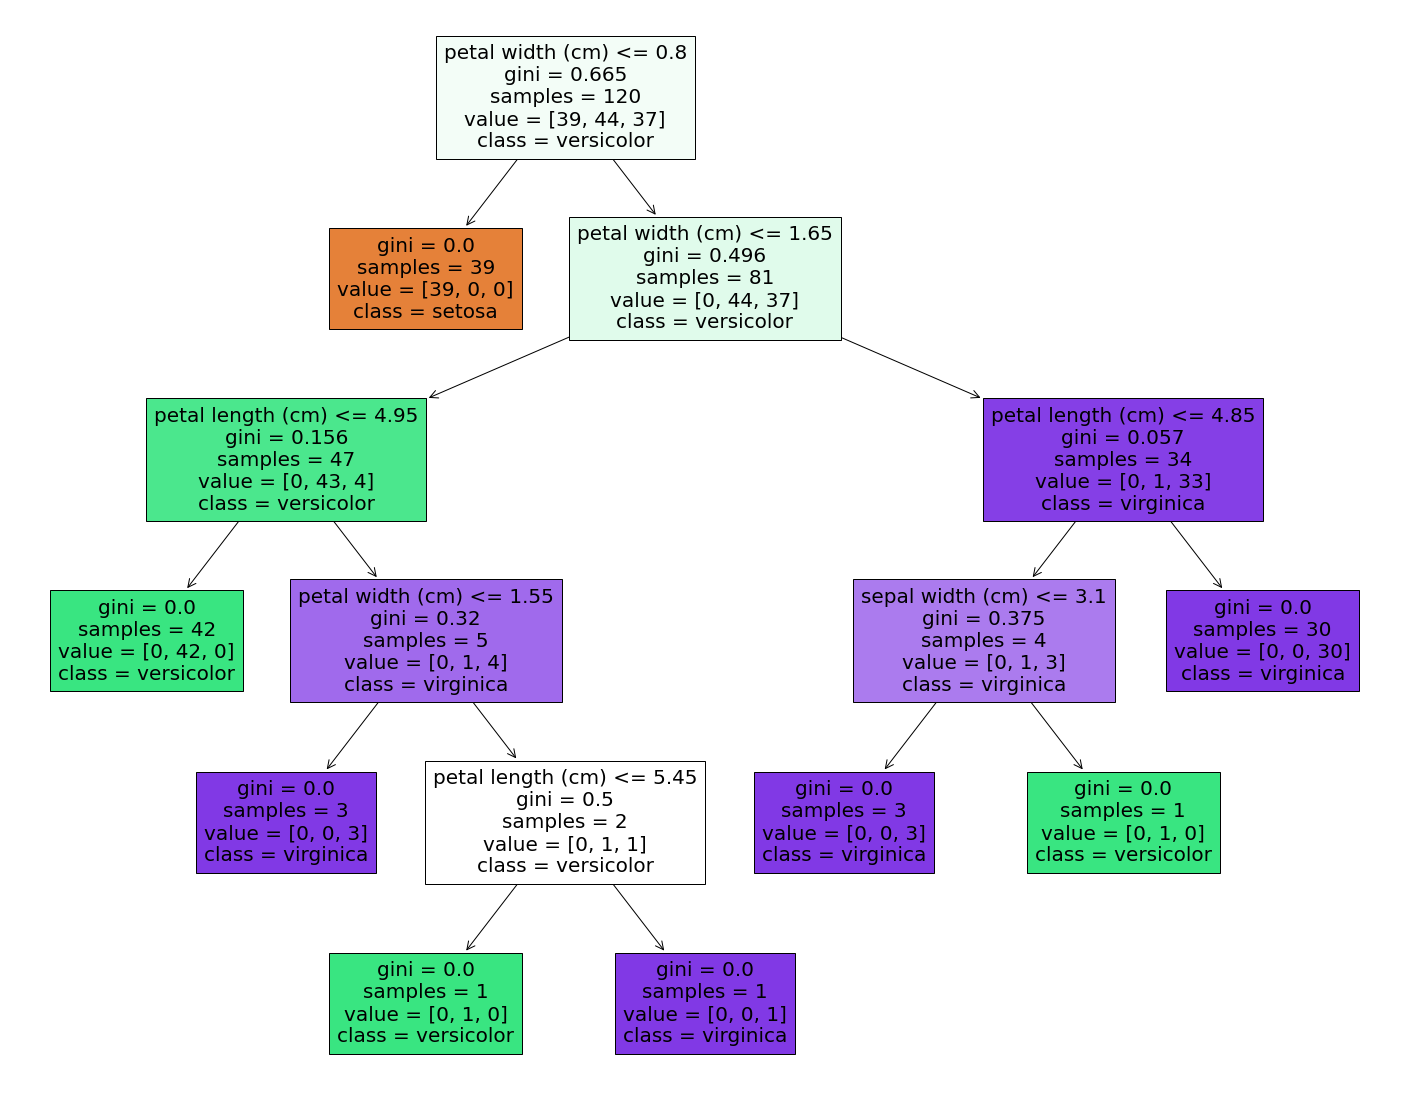

In [8]:
# Visualize the Decision Tree
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names,filled=True)
plt.savefig("decistion_tree.png")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



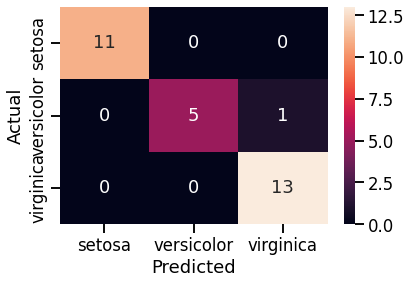

In [9]:
#check model accuracy
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

#plot a confusion matrix using seaborn
cm = confusion_matrix(y_test, y_test_pred)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_xticklabels(iris.target_names);
ax.set_yticklabels(iris.target_names);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

# 3. Bagging Classifier

* to build base estimators parallelly based on subset data.
* to aggregate their combined predictions by voting or averaging

In [10]:
from sklearn.ensemble import BaggingClassifier
?BaggingClassifier

# Answer Questions:
# What is the default base model of aggingClassifier?
# What is the default number of estimators?


Accracy:  0.9666666666666667
Total number of trees: 10


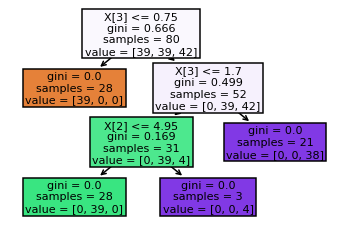

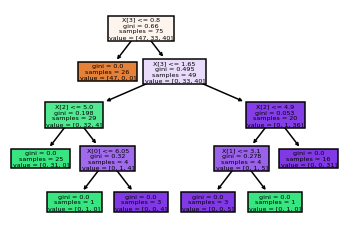

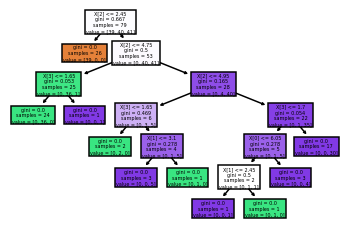

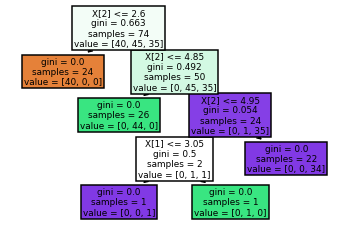

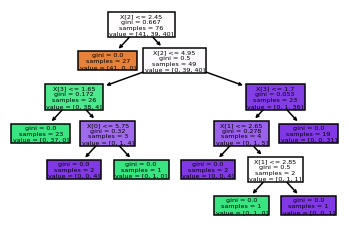

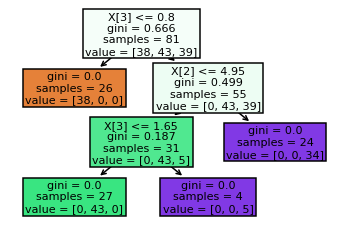

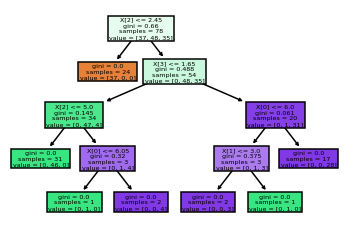

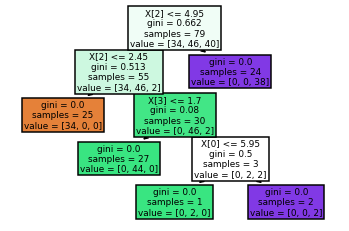

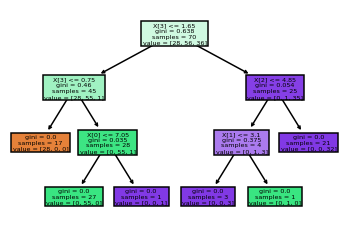

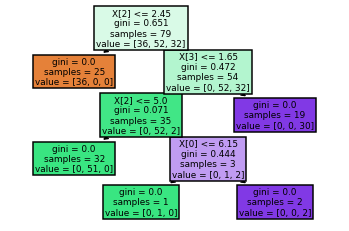

In [11]:
bag_clf = BaggingClassifier()
# bag_clf = BaggingClassifier(DecisionTreeClassifier())
# bag_clf = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

bag_clf.fit(X_train, y_train)

print('Accracy: ', bag_clf.score(X_test,y_test) )
print('Total number of trees:', bag_clf.n_estimators)

for tree in bag_clf.estimators_:
    plot_tree(tree, filled=True)
    plt.show()   

In [12]:
#Try your self:
# Create a BaggingClassifier with 
# base model:  DecisionTree
# number of estimators: 20
# max_samples=0.2

# Compare the number of tree nodes of each estimator with the default parameters

####Ans

Accracy:  0.9666666666666667
Total number of trees: 20


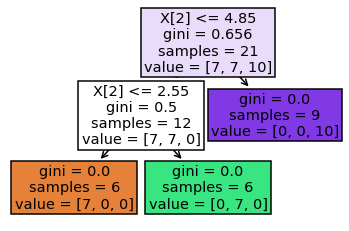

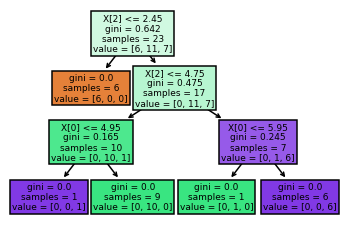

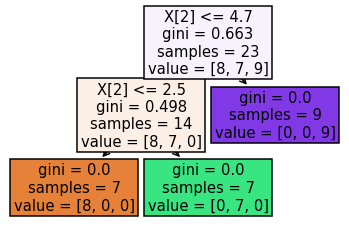

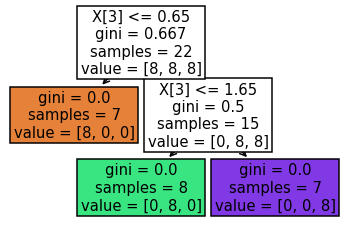

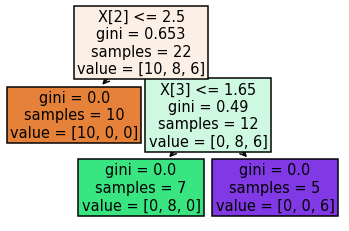

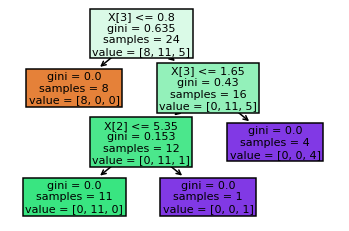

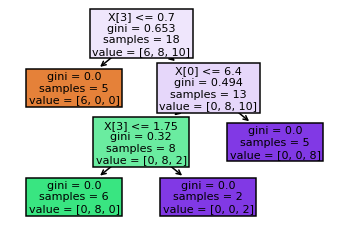

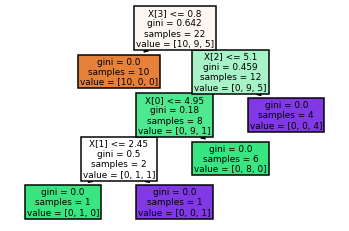

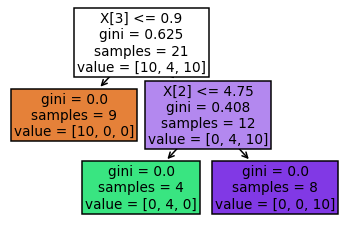

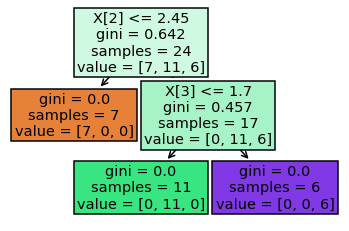

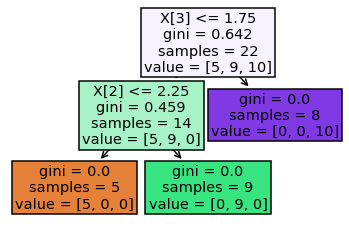

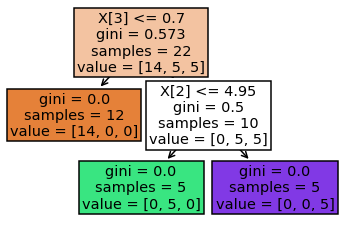

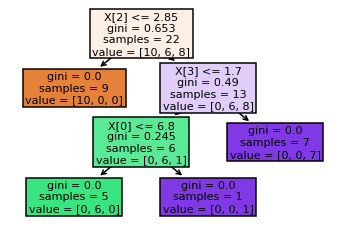

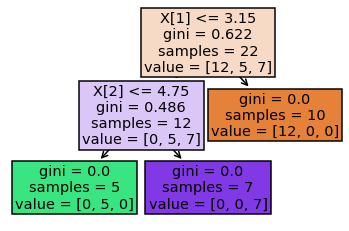

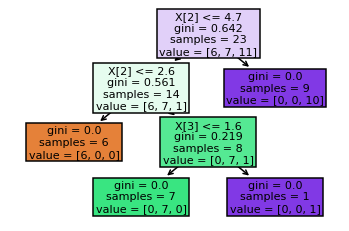

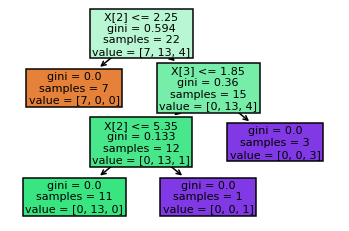

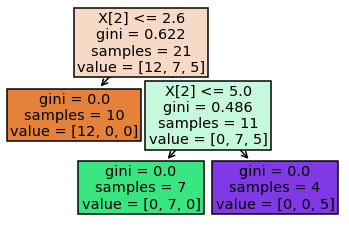

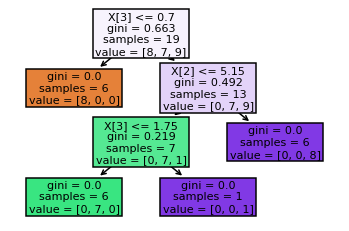

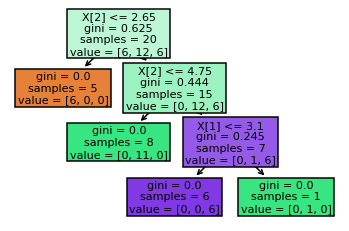

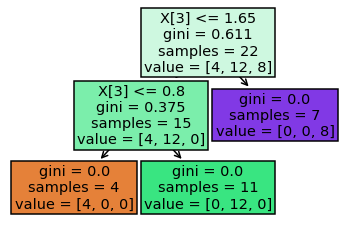

In [13]:
bag_clf = BaggingClassifier(n_estimators=20, max_samples=0.2)
bag_clf.fit(X_train, y_train)

print('Accracy: ', bag_clf.score(X_test,y_test) )
print('Total number of trees:', bag_clf.n_estimators)

for tree in bag_clf.estimators_:
    plot_tree(tree, filled=True)
    plt.show() 

# 4.  AdaBoost classifier

* AdaBoost is an iterative algorithm (each iteration is called a boosting round)
* AdaBoost trains base classifiers using random subsets of instances drawn from the training set
* AdaBoost uses adaptive probability distribution. Each instance in the training set is given a weight. The weight determines the probability of being drawn from the training set. AdaBoost adaptively changes the weights at each boosting round

In [14]:
from sklearn.ensemble import AdaBoostClassifier
?AdaBoostClassifier

# Question: 
# What is the default number of base models in AdaBoostClassifier?
# How many tree nodes in each base estimator?

Accracy:  0.9666666666666667
Total number of trees: 50


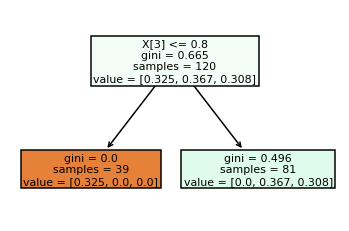

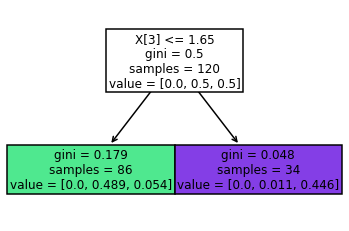

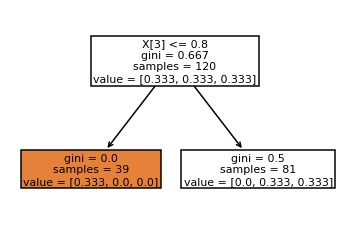

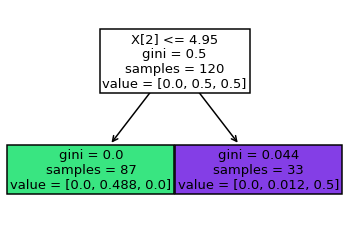

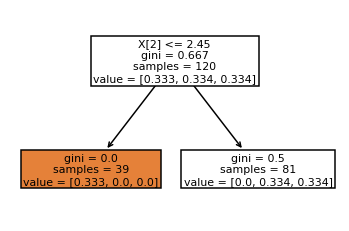

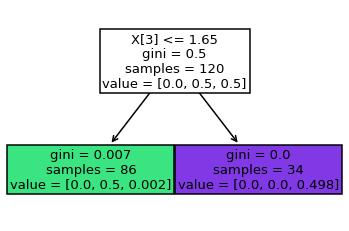

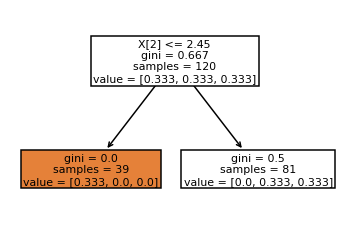

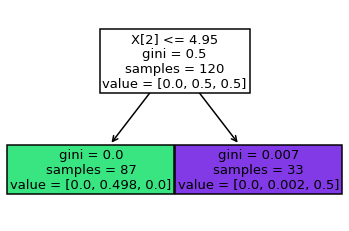

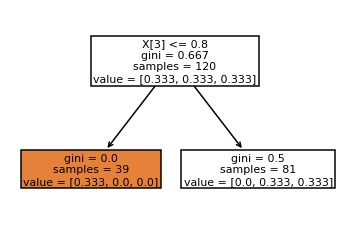

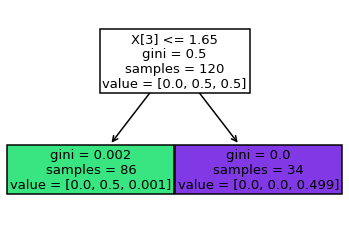

In [15]:
ada_clf = AdaBoostClassifier()
# ada_clf = AdaBoostClassifier(DecisionTreeClassifier())
ada_clf.fit(X_train, y_train)
acc = ada_clf.score(X_test,y_test)  

print('Accracy: ', acc)
print('Total number of trees:', ada_clf.n_estimators)

count = 0
for tree in ada_clf.estimators_:
    plot_tree(tree, filled=True)
    plt.show() 
    count += 1
    if count==10: break   



A decision stump is a very short decision tree with only a single split 

# 5. Gradient Boosting classifier

* Gradient Boosting works sequentially by adding predictors to an ensemble, each one correcting its predecessor.
* Instead of reweighting the training instances at every iteration, Gradient Boosting fits the new predictor to the residual errors (loss function) made by the previous predictor.

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
?GradientBoostingClassifier

# Questions: 
# What is the loss function applied in GradientBoostingClassifier?
# What is the loss function applied in AdaBoostClassifier?


In [17]:
gr_clf = GradientBoostingClassifier()  #with default parameters
gr_clf.fit(X_train, y_train)

print('Accracy: ', gr_clf.score(X_test,y_test) )
print('Total number of estimator:', gr_clf.n_estimators)

# print(gr_clf.estimators_[0])

Accracy:  0.9666666666666667
Total number of estimator: 100


In [18]:
# Tyr your Self: Plot the GradientBoostingClassifier map

####Ans

Base estimator No. 1


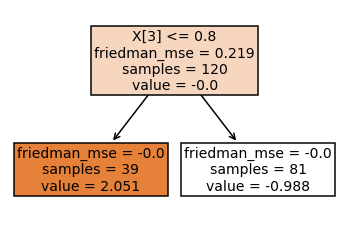

Base estimator No. 2


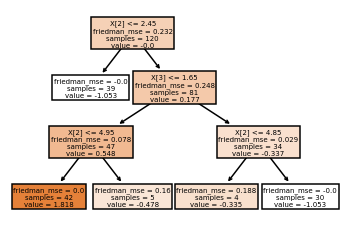

Base estimator No. 3


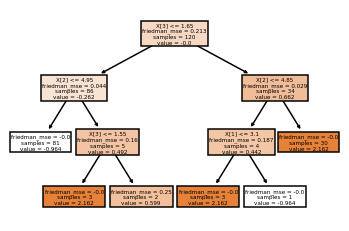

Base estimator No. 4


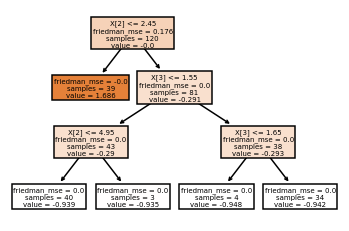

Base estimator No. 5


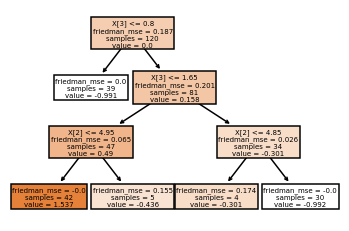

Base estimator No. 6


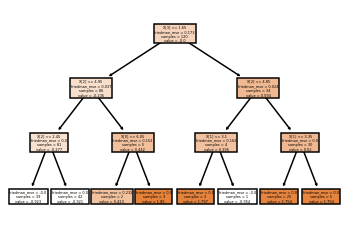

Base estimator No. 7


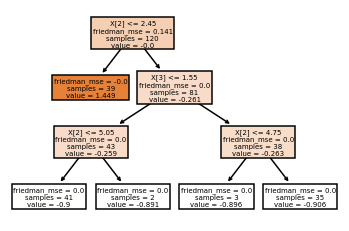

Base estimator No. 8


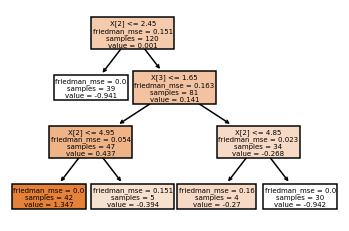

Base estimator No. 9


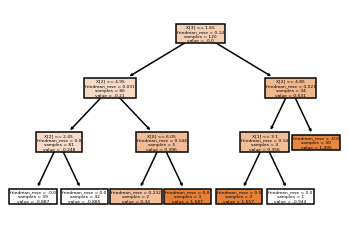

Base estimator No. 10


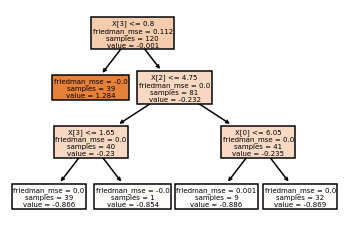

Base estimator No. 11


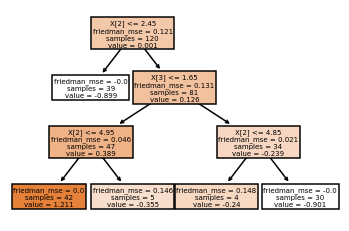

Base estimator No. 12


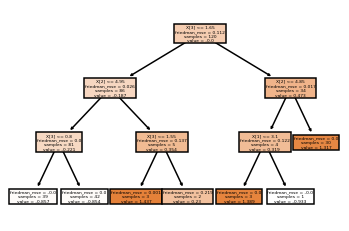

Base estimator No. 13


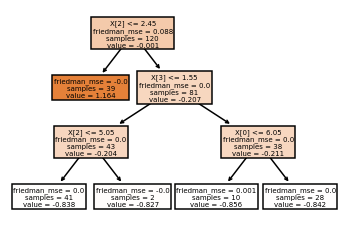

Base estimator No. 14


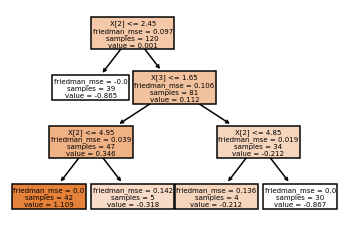

Base estimator No. 15


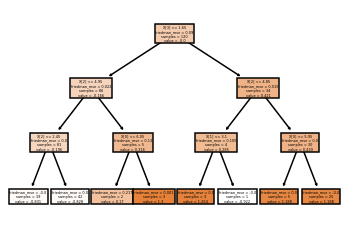

Base estimator No. 16


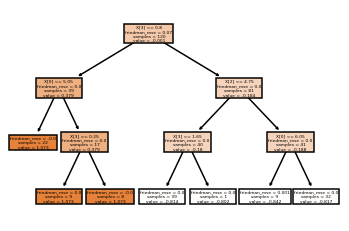

Base estimator No. 17


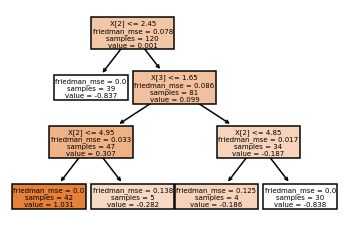

Base estimator No. 18


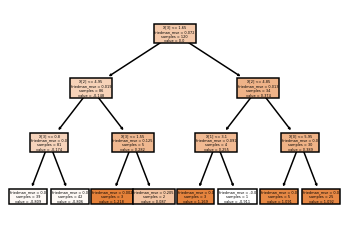

Base estimator No. 19


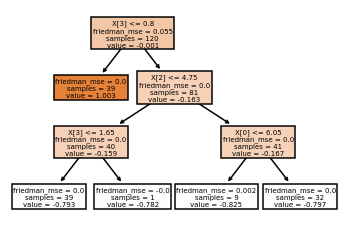

Base estimator No. 20


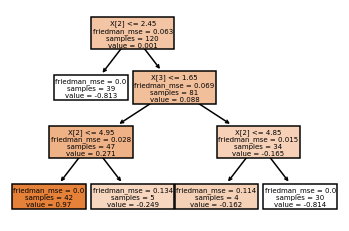

Base estimator No. 21


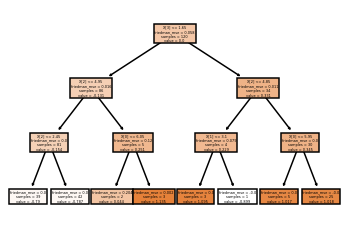

In [19]:
count = 1
for e in gr_clf:
  if count>=20:  break
  for clf in e:
    print('Base estimator No.',count) 
    count += 1    
    plot_tree(clf, filled=True) 
    plt.show()

# 6. Random Forest

* A random forest is an Bagging ensemble of randomized decision trees, resulting in greater tree diversity
* Each decision tree is trained with random samples of data drawn from the training set using the bagging method

In [20]:
# Random Forest Classifier Using default parameters
from sklearn.ensemble import RandomForestClassifier

?RandomForestClassifier

# Questions:
# What is the default number of sub-trees in RandomForestClassifier?
# what id the max_depth of each sub-tree?


In [36]:
clf = RandomForestClassifier()   #with default parameters
# clf = RandomForestClassifier(n_estimators=50)

start=time.time()
clf.fit(X_train,y_train)
acc = clf.score(X_test,y_test) 
print('Accuracy:', acc)
print('Number of trees:', clf.n_estimators)

end=time.time()
diff=end-start
print("Execution time:",diff)

Accuracy: 0.9666666666666667
Number of trees: 100
Execution time: 0.806614875793457


In [22]:
# Evaluate the model by cross-validation (Self-directed learning)
from sklearn.model_selection import cross_val_score
?cross_val_score 

scores = cross_val_score(clf, X, y, cv=10)
print('Scores', scores)

print(f'Count: {len(scores)}, Mean: {scores.mean():0.2f}, Stdev: {scores.std():0.5f}')

Scores [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Count: 10, Mean: 0.97, Stdev: 0.03333


# 7. Plot Tree

The total number of trees are 100


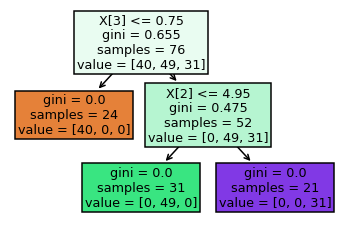

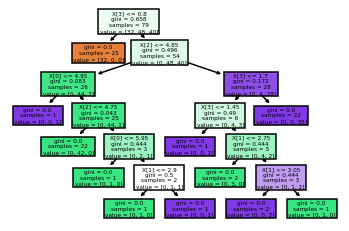

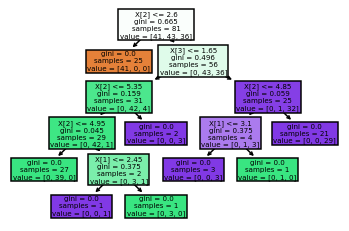

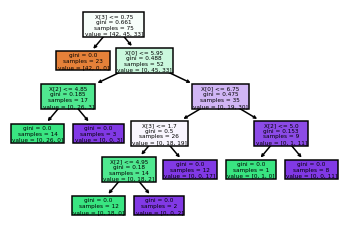

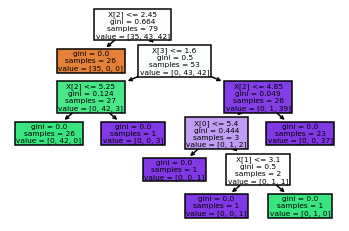

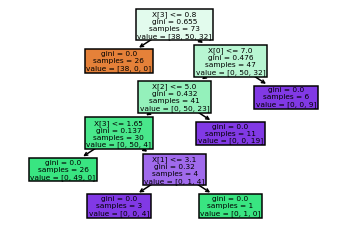

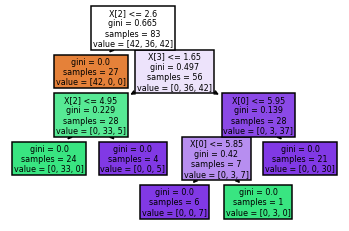

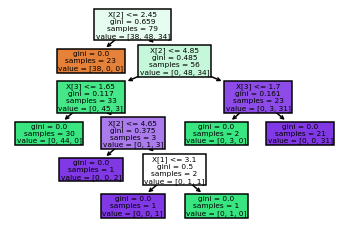

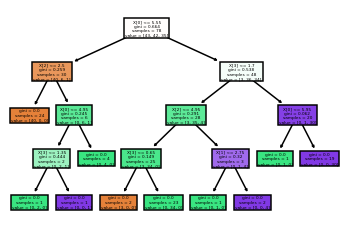

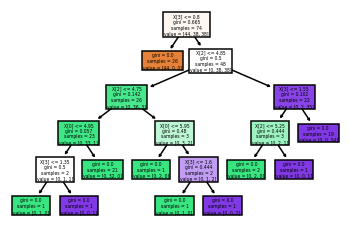

In [23]:
#plot trees
print('The total number of trees are', len(clf.estimators_))

count = 0
for tree_in_forest in clf.estimators_:
  if count<10:
    plot_tree(tree_in_forest, filled=True)
    plt.show()
    count += 1

In [24]:
# Optimization of Parameters: number of trees
clf = RandomForestClassifier(max_depth=5)
acc_list = []

# Iterate through a range of numbers of trees
for n_trees in range(2,10):    
    # Use this to set the number of trees
    clf.set_params(n_estimators=n_trees)
    clf.fit(X_train, y_train)
    
    acc = clf.score(X_test,y_test)    
    acc_list.append(pd.Series({'n_trees': n_trees, 'acc': acc}))

pd.concat(acc_list, axis=1).T.set_index('n_trees')

,acc
n_trees,
2.0,0.933333
3.0,0.966667
4.0,0.966667
5.0,0.933333
6.0,0.966667
7.0,0.966667
8.0,0.966667
9.0,0.966667


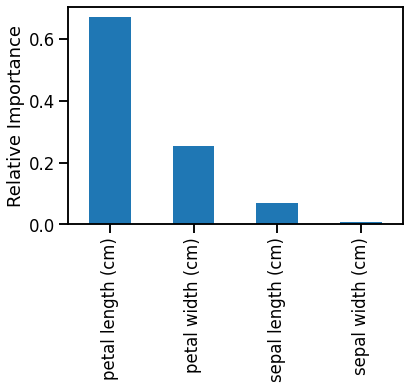

In [25]:
#feature importance
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
fig = plt.figure()
ax = feature_imp.plot(kind='bar')
ax.set(ylabel='Relative Importance');

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



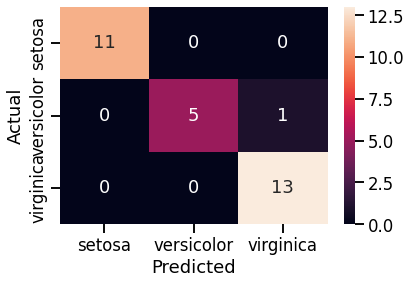

In [26]:
#check model accuracy
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_xticklabels(iris.target_names);
ax.set_yticklabels(iris.target_names);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

# 8. XGBoost 

In [27]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import xgboost as xgb
import time

start=time.time()
xgbc=xgb.XGBClassifier()

xgbc.fit(X_train,y_train)
acc_xgboost = xgbc.score(X_test,y_test) 
print('Accuracy:', acc_xgboost)
print('Number of trees:', xgbc.n_estimators)

end=time.time()
diff=end-start
print("Execution time:",diff)

Accuracy: 0.9666666666666667
Number of trees: 100
Execution time: 0.3818080425262451


In [33]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import lightgbm

start=time.time()
lgbmr=lightgbm.LGBMClassifier()

lgbmr.fit(X_train,y_train)
acc_lgbmr = lgbmr.score(X_test,y_test) 
print('Accuracy:', acc_lgbmr)
print('Number of trees:', lgbmr.n_estimators)

end=time.time()
diff=end-start
print("Execution time:",diff)

Accuracy: 0.9666666666666667
Number of trees: 100
Execution time: 0.04107952117919922
